In [ ]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import functional as F

import sys
sys.path.insert(1, r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\source")
from data_utils import *

In [2]:
import json

# Load the JSON annotation file for the desired set (train or val)
with open(r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_dataset\annotations\instances_train2017.json", 'r') as f:
    coco_data = json.load(f)

# Extract the categories from the 'categories' key in the JSON
categories = coco_data['categories']

labels ={}
# Print the list of category names
for category in categories:
    labels[category['id'] ] = category['name']

In [3]:
# Define your dataset path and annotation file
dataset_root = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_dataset\train2017"
annotation_file = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_dataset\annotations\instances_train2017.json"

# Define data transformations (adjust as needed)
data_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Create an instance of the custom dataset
dataset = CocoDataset(root_dir=dataset_root, annotation_file=annotation_file, transform=data_transform)

# Create a data loader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

In [29]:
import matplotlib.pyplot as plt
import random
# Define the number of categories (80 in your case)
num_categories = len(labels)

# Create a colormap with distinct colors
colors = plt.cm.get_cmap('tab20', num_categories)

# Shuffle the colors
color_list = [colors(i)[:3] for i in range(num_categories)]
random.shuffle(color_list)

# Generate a colormap dictionary
category_colormap = {i + 1: tuple(int(255 * c) for c in color_list[i]) for i in range(num_categories)}

C:\Users\melmourabitagharbi\AppData\Local\Temp\ipykernel_7312\4130038731.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_categories)


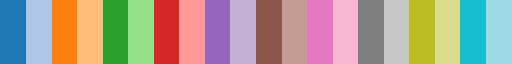

In [26]:
colors

In [27]:
# Print the category and its associated color
for category_id, color in category_colormap.items():
    category_name = labels.get(category_id, "Unknown")
    print(f"Category ID: {category_id}, Name: {category_name}, Color: {color}")

Category ID: 1, Name: person, Color: (247, 182, 210)
Category ID: 2, Name: bicycle, Color: (227, 119, 194)
Category ID: 3, Name: car, Color: (140, 86, 75)
Category ID: 4, Name: motorcycle, Color: (148, 103, 189)
Category ID: 5, Name: airplane, Color: (255, 187, 120)
Category ID: 6, Name: bus, Color: (255, 152, 150)
Category ID: 7, Name: train, Color: (227, 119, 194)
Category ID: 8, Name: truck, Color: (140, 86, 75)
Category ID: 9, Name: boat, Color: (127, 127, 127)
Category ID: 10, Name: traffic light, Color: (23, 190, 207)
Category ID: 11, Name: fire hydrant, Color: (247, 182, 210)
Category ID: 12, Name: Unknown, Color: (174, 199, 232)
Category ID: 13, Name: stop sign, Color: (127, 127, 127)
Category ID: 14, Name: parking meter, Color: (152, 223, 138)
Category ID: 15, Name: bench, Color: (196, 156, 148)
Category ID: 16, Name: bird, Color: (188, 189, 34)
Category ID: 17, Name: cat, Color: (197, 176, 213)
Category ID: 18, Name: dog, Color: (148, 103, 189)
Category ID: 19, Name: horse, C

(23, 190, 207)
(199, 199, 199)
(199, 199, 199)
(152, 223, 138)


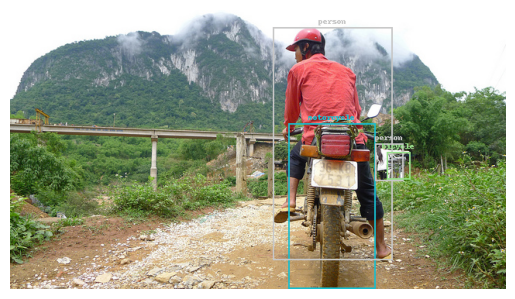

In [30]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import torch

# Get the annotations for the first image
image_id = 0   # Index of the first image in the dataset

# Get the RGB image tensor from your dataset
image_tensor = dataset[image_id][0]

# Ensure the image tensor is in the correct format (HWC: Height, Width, Channels)
image_tensor = image_tensor.permute(1, 2, 0)

# Convert the tensor to a NumPy array
rgb_image_array = image_tensor.cpu().numpy()

# Normalize the pixel values to [0, 255] and cast to uint8
rgb_image_array = (rgb_image_array * 255).astype(np.uint8)

# Create a PIL Image from the RGB array
image = Image.fromarray(rgb_image_array)

# Create a draw object to add bounding boxes and labels to the image
draw = ImageDraw.Draw(image)

# Get the annotations for the first image
annotations = dataset[image_id][1]

for i in range(len(annotations['boxes'])):
    category_id = annotations['labels'][i]
    bbox = annotations['boxes'][i]
    
    
    category_name = labels[category_id.item()]
    color = category_colormap.get(category_id.item(), (0, 0, 0))  # Default to black for unknown categories
    print(color)
    # Convert COCO format (x, y, width, height) to PIL format (left, top, right, bottom)
    left, top, width, height = bbox
    right = left + width
    bottom = top + height

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline=color, width=2)

    # Use textbbox instead of textsize
    text = f"{category_name}"
    text_bbox = draw.textbbox((0, 0), text)
    text_x = (left + right - text_bbox[2]) / 2
    text_y = top - text_bbox[3] - 2  # Adjust for spacing
    draw.text((text_x, text_y), text, fill=color)


# Display the image with bounding boxes and labels
plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

image.save('output.png')

#To display on a new windows bigger
image.show()

In [ ]:
color